Dados de exemplo:
   Investimento     Risco  Retorno Esperado  Sucesso
0      3.745401  1.851329          2.617057        0
1      9.507143  5.419009          2.469788        0
2      7.319939  8.729458          9.062546        0
3      5.986585  7.322249          2.495462        0
4      1.560186  8.065611          2.719497        0

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       193
           1       0.33      0.29      0.31         7

    accuracy                           0.95       200
   macro avg       0.65      0.63      0.64       200
weighted avg       0.95      0.95      0.95       200



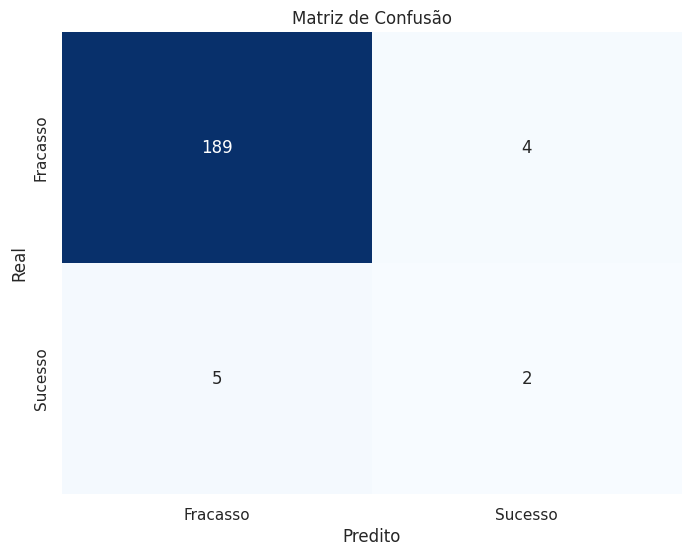

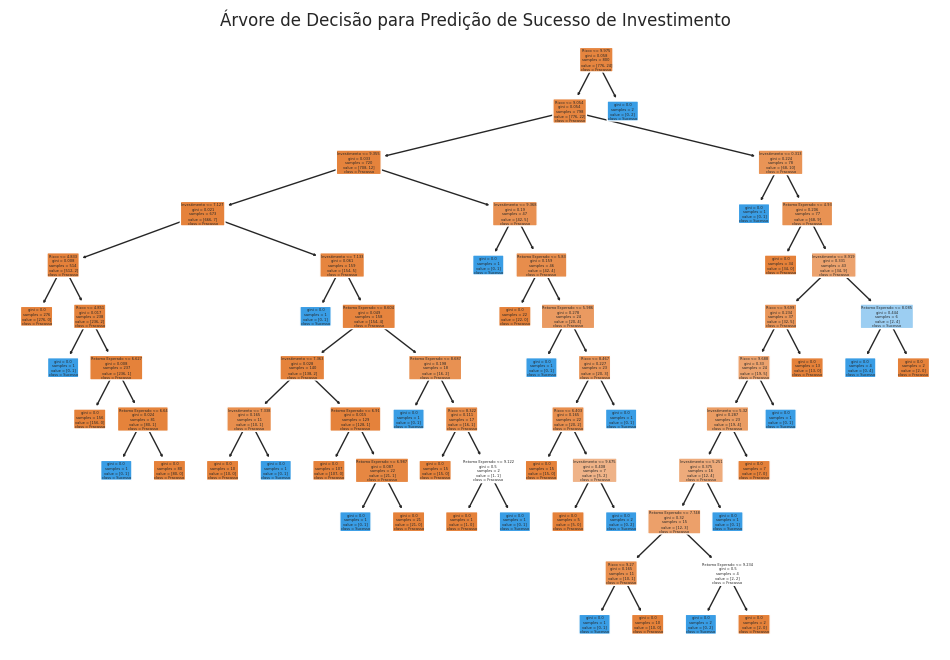

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

sns.set(style="whitegrid")

np.random.seed(42)
n_samples = 1000

X1 = np.random.rand(n_samples) * 10
X2 = np.random.rand(n_samples) * 10
X3 = np.random.rand(n_samples) * 10


y = (0.3 * X1 + 0.5 * X2 + 0.2 * X3 + np.random.randn(n_samples) * 2 > 10).astype(int)

data = pd.DataFrame({
    'Investimento': X1,
    'Risco': X2,
    'Retorno Esperado': X3,
    'Sucesso': y
})

print("Dados de exemplo:")
print(data.head())

X = data[['Investimento', 'Risco', 'Retorno Esperado']]
y = data['Sucesso']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fracasso', 'Sucesso'], yticklabels=['Fracasso', 'Sucesso'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=['Fracasso', 'Sucesso'], filled=True, rounded=True)
plt.title('Árvore de Decisão para Predição de Sucesso de Investimento')
plt.show()